# 🌊 **Klasifikasi Tsunami Menggunakan Gradient Boosting Classifier dan Support Vector Machine**

## 🎯 **Tujuan Proyek**
Proyek ini bertujuan untuk **membangun dan membandingkan performa dua algoritma klasifikasi** dalam memprediksi kemungkinan terjadinya **tsunami** berdasarkan data parameter gempa bumi.  
Dataset yang digunakan adalah **`earthquake_data_tsunami.csv`**, yang berisi data numerik seperti magnitudo, kedalaman, lokasi, serta label target `tsunami` (0 = tidak, 1 = ya).

Proyek ini disusun untuk memenuhi **Ujian Tengah Semester (UTS)** mata kuliah **Pembelajaran Mesin**, dengan fokus pada penerapan **data preprocessing**, **pipeline modeling**, **feature selection**, serta **evaluasi model klasifikasi numerik** sesuai pedoman yang diberikan dosen pengampu.

---

## ⚙️ **Tujuan Analisis**
1. Melakukan **pembersihan data** dengan memeriksa nilai kosong, duplikat, dan outlier.  
2. Melakukan **preprocessing** data numerik serta memisahkan fitur (`X`) dan target (`y`).  
3. Membangun **dua model klasifikasi utama**:
   - **Tree-Based Model** → Random Forest  
   - **Linear-Based Model** → Logistic Regression  
4. Melakukan **eksperimen pembelajaran mesin** dengan:
   - **Dua metode penskalaan (scaling):** `StandardScaler` dan `MinMaxScaler`  
   - **Dua metode seleksi fitur (feature selection):** `SelectKBest` dan `SelectPercentile`  
5. Menggunakan **GridSearchCV** dengan **StratifiedKFold Cross Validation** untuk mencari parameter optimal.  
6. Membandingkan hasil evaluasi model berdasarkan **akurasi, presisi, recall, dan F1-score** serta menampilkan **visualisasi confusion matrix**.

---

## 🌳 **Alasan Pemilihan Algoritma**
- **Gradient Boosting Classifier**  
  Gradient Boosting Classifier merupakan algoritma ansambel berbasis pohon keputusan (decision tree) yang bekerja dengan cara membangun model secara bertahap dan memperbaiki kesalahan dari model sebelumnya.
Algoritma ini sangat kuat untuk data yang bersifat non-linear seperti karakteristik bencana alam (magnitudo, kedalaman, koordinat, intensitas, dll).

- **Support Vector Machine (Linear-Based)**  
  SVM adalah algoritma klasifikasi berbasis margin yang bekerja dengan mencari hyperplane terbaik untuk memisahkan dua kelas (0 dan 1).
Model ini sangat efektif untuk data berdimensi kecil-menengah dengan batas klasifikasi yang tegas, seperti kasus tsunami (ada atau tidak).

---

## 🧩 **Tahapan Eksperimen**
1. **Data Understanding & Cleaning**  
   Mengecek struktur data, nilai kosong, duplikat, dan distribusi fitur.  
2. **Feature Selection & Encoding**  
   Menentukan kolom fitur (X) dan target (y) serta memastikan seluruh data numerik siap diproses.  
3. **Train-Test Split**  
   Membagi data menjadi data latih dan uji (contoh: 80:20 atau 75:25 atau 70:30) dengan parameter `random_state` sesuai dua digit NPM terbesar anggota kelompok.  
4. **Pipeline Construction**  
   Membangun pipeline untuk kedua model, berisi tahap scaling → feature selection → classifier.  
5. **Model Training & Tuning**  
   Melakukan pencarian parameter terbaik menggunakan **GridSearchCV** dan validasi lipat (**StratifiedKFold**).  
6. **Evaluation & Visualization**  
   Membandingkan hasil evaluasi model menggunakan metrik klasifikasi serta menampilkan **Confusion Matrix** dan **Classification Report**.

---

## 📊 **Hasil yang Diharapkan**
- Didapatkan **model terbaik** dengan skor F1 dan akurasi tertinggi.  
- Teridentifikasi **fitur-fitur paling relevan** dalam menentukan potensi tsunami.  
- Diperoleh **perbandingan performa** antara model Random Forest dan Logistic Regression sebagai dasar analisis efektivitas algoritme berbasis pohon dan linear.

---


In [ ]:
# ============================================================
# 🧮 IMPORT LIBRARY — Pengolahan Data, Modeling, & Evaluasi #
# ============================================================

# 📦 Manipulasi Data
import pandas as pd
import numpy as np

# 📊 Visualisasi
import matplotlib.pyplot as plt

# 🔧 Pembagian data & pencarian hyperparameter
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

# ⚙️ Pra-pemrosesan & Seleksi Fitur
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif

# 🤖 Model Klasifikasi
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

# 🧩 Pipeline & Utilitas
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import mutual_info_classif
import time
from sklearn.metrics import precision_score, recall_score, f1_score

# 📈 Evaluasi Model
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    accuracy_score,
)

np.random.seed(98)
from functools import partial

# **Load Data**

In [21]:
# Load Dataset
df_tsunami = pd.read_csv("dataset/earthquake_data_tsunami.csv", header=0)

df_tsunami.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,Year,Month,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,2022,11,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,2022,11,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,2022,11,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,2022,11,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,2022,11,1


In [22]:
# Info cepat tentang kolom & tipe datanya
print("Jumlah baris, kolom:", df_tsunami.shape)    
print("\nTipe data:")
print(df_tsunami.dtypes)

Jumlah baris, kolom: (782, 13)

Tipe data:
magnitude    float64
cdi            int64
mmi            int64
sig            int64
nst            int64
dmin         float64
gap          float64
depth        float64
latitude     float64
longitude    float64
Year           int64
Month          int64
tsunami        int64
dtype: object


# **Pembersihan Data**

In [23]:
# 1) Hapus kolom 'year' dan `month`
df_tsunami2 = df_tsunami.drop(columns=['Year', 'Month'], errors='ignore')
df_tsunami2.head()

,magnitude,cdi,mmi,sig,nst,dmin,gap,depth,latitude,longitude,tsunami
0,7.0,8,7,768,117,0.509,17.0,14.000,-9.7963,159.596,1
1,6.9,4,4,735,99,2.229,34.0,25.000,-4.9559,100.738,0
2,7.0,3,3,755,147,3.125,18.0,579.000,-20.0508,-178.346,1
3,7.3,5,5,833,149,1.865,21.0,37.000,-19.2918,-172.129,1
4,6.6,0,2,670,131,4.998,27.0,624.464,-25.5948,178.278,1


# Menangani Data duplikat dan Missing Value

In [24]:
# 1) Cek jumlah nilai kosong per kolom
print("Jumlah nilai kosong per Kolom:\n", df_tsunami.isnull().sum())

Jumlah nilai kosong per Kolom:
 magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
Year         0
Month        0
tsunami      0
dtype: int64


In [25]:
# 2) Contoh pengisian: gunakan median untuk kolom 'texture_mean' (jika ada)
median_chole = df_tsunami2['cdi'].median()
df_tsunami2['cdi'] = df_tsunami2['cdi'].fillna(median_chole)
print("\nMedian cdi:", median_chole)
#karena dataset yang kami miliki tidak memiliki data kosong/NaN/NULL maka kami mengambil salah satu contoh penangan jika ada data kosong di cdi


Median cdi: 5.0


In [26]:
# 3) Validasi ulang
print("\nSetelah inputasi, nilai kosong per kolom:\n", df_tsunami2.isnull().sum())


Setelah inputasi, nilai kosong per kolom:
 magnitude    0
cdi          0
mmi          0
sig          0
nst          0
dmin         0
gap          0
depth        0
latitude     0
longitude    0
tsunami      0
dtype: int64


### **Pembersihan Data (Bagian 3): Cek & Hapus Duplikat**
- Data yang **kembar** dapat merusak evaluasi model.
- Kita cek duplikat lalu **drop** agar setiap baris unik.


In [27]:
before = df_tsunami2.shape
dupes = df_tsunami2[df_tsunami2.duplicated(keep=False)]
print(f"Jumlah baris duplikat (terhitung ganda): {dupes.shape[0]}")
df_tsunami3 = df_tsunami2.drop_duplicates(keep='first')
print("Bentuk data sebelum/ setelah hapus duplikat:", before, "->", df_tsunami3.shape)

Jumlah baris duplikat (terhitung ganda): 0
Bentuk data sebelum/ setelah hapus duplikat: (782, 11) -> (782, 11)


### **Pembersihan Data (Bagian 4): Cek Outlier**
- Data yang **Outlier** dapat merusak evaluasi model.
- Kenapa tidak dihapus? karena itu adalah fenomena nyata dan **Penting** untuk klasifikasi.


In [28]:
numeric_cols = df_tsunami3.select_dtypes(include=np.number).columns

print("Pengecekan outlier untuk setiap fitur numerik:\n")
for col in numeric_cols:
    Q1 = df_tsunami3[col].quantile(0.25)
    Q3 = df_tsunami3[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df_tsunami3[col] < (Q1 - 1.5 * IQR)) | (df_tsunami3[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"{col}: {outliers} outlier")

Pengecekan outlier untuk setiap fitur numerik:

magnitude: 37 outlier
cdi: 0 outlier
mmi: 1 outlier
sig: 73 outlier
nst: 0 outlier
dmin: 61 outlier
gap: 48 outlier
depth: 139 outlier
latitude: 0 outlier
longitude: 0 outlier
tsunami: 0 outlier


In [29]:
# Tangani outlier depth dengan batas atas
df_tsunami3['depth'] = np.where(df_tsunami3['depth'] > 700, 700, df_tsunami3['depth'])
df_tsunami4 = df_tsunami3.copy()

# Hapus outlier di semua kolom numerik
for col in numeric_cols:
    Q1 = df_tsunami3[col].quantile(0.25)
    Q3 = df_tsunami3[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df_tsunami4 = df_tsunami4[(df_tsunami4[col] >= lower) & (df_tsunami4[col] <= upper)]

print("\nJumlah data sebelum:", len(df_tsunami3))
print("\nJumlah data sesudah :", len(df_tsunami4))

print("Pengecekan outlier untuk setiap fitur numerik:\n")
for col in numeric_cols:
    Q1 = df_tsunami4[col].quantile(0.25)
    Q3 = df_tsunami4[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = ((df_tsunami4[col] < (Q1 - 1.5 * IQR)) | (df_tsunami4[col] > (Q3 + 1.5 * IQR))).sum()
    print(f"{col}: {outliers} outlier")



Jumlah data sebelum: 782

Jumlah data sesudah : 478
Pengecekan outlier untuk setiap fitur numerik:

magnitude: 17 outlier
cdi: 0 outlier
mmi: 0 outlier
sig: 26 outlier
nst: 0 outlier
dmin: 35 outlier
gap: 5 outlier
depth: 21 outlier
latitude: 4 outlier
longitude: 13 outlier
tsunami: 0 outlier


### **Pembagian Data: Train/Test Split**

- **X**: semua fitur kecuali label target.  
- **y**: kolom target, yaitu `tsunami` (1 = Ya)
 atau (0 = Tidak )
- Kita pakai **30%** data untuk **test** dan sisanya untuk **train**.


In [30]:
# Menentukan X sebagai fitur (semua kolom kecuali tsunami)
X = df_tsunami4.drop(columns=['tsunami'])

# Menentukan y sebagai target (kolom tsunami)
y = df_tsunami4['tsunami']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=98, stratify=y
)
print("Ukuran X_train, X_test :", X_train.shape, X_test.shape)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=98)

Ukuran X_train, X_test : (382, 10) (96, 10)


### **Membangun Model **Gradient Boosting Classifier** dengan Pipeline + GridSearchCV**

Pada bagian ini, kita akan membangun model Gradient **Boosting Classifier** (GBC) — salah satu algoritma ensemble boosting yang sangat populer dan unggul dalam menangani data dengan pola non-linear serta hubungan antar fitur yang kompleks.

### Konsep Singkat **Gradient Boosting**:

Gradient Boosting bekerja dengan cara membangun model secara bertahap (sekuensial), di mana setiap pohon baru berfokus untuk memperbaiki kesalahan prediksi dari model sebelumnya.
Setiap model kecil (weak learner) adalah decision tree shallow, dan hasil akhirnya merupakan gabungan dari seluruh model untuk meminimalkan error.
→ Semakin banyak iterasi (jumlah estimator), semakin baik kemampuan model dalam mempelajari pola data — namun dengan risiko overfitting jika tidak dikontrol dengan baik.

### Alur Pipeline:

1. **Scaling (MinMaxScaler vs StandardScaler)**
Digunakan untuk menjaga konsistensi pipeline, meskipun model berbasis pohon sebenarnya tidak sensitif terhadap skala fitur.
Scaling tetap disertakan agar pipeline bisa dibandingkan langsung dengan model lain (seperti SVM) secara adil.

2. **Feature Selection (SelectKBest vs SelectPercentile)**
Berfungsi menyaring fitur yang paling berpengaruh terhadap variabel target:

- SelectKBest: memilih jumlah fitur terbaik (k) berdasarkan skor tertinggi.

- SelectPercentile: memilih persentase fitur terbaik (%) berdasarkan distribusi skor.
Pemilihan skor didasarkan pada metode mutual information, yang mengukur ketergantungan non-linear antar fitur dan target.

3. **Model (GradientBoostingClassifier)**
Parameter penting yang diuji dalam GridSearchCV antara lain:

- n_estimators: jumlah pohon yang digunakan dalam boosting.

- learning_rate: tingkat kontribusi setiap pohon baru dalam model keseluruhan.

- max_depth: kedalaman maksimum dari masing-masing pohon dasar.

- random_state: untuk menjaga reprodusibilitas hasil eksperimen.

###  Tujuan GridSearchCV:
Melakukan **pencarian otomatis kombinasi parameter terbaik** untuk menghasilkan model dengan performa optimal,  
dengan evaluasi menggunakan **5-fold Stratified Cross Validation** dan metrik **F1-score**.

Output dari cell ini:
- Model Gradient Boosting Classifier terbaik  
- Waktu komputasi total  
- Parameter optimal hasil pencarian GridSearch

In [32]:
# ==============================================================
# Pipeline Gradient Boosting Classifier 
# ==============================================================
mutual_info_fixed = partial(mutual_info_classif, random_state=98)

pipe_gb = Pipeline([
    ('selector', SelectKBest(score_func=mutual_info_fixed)),
    ('clf', GradientBoostingClassifier(random_state=98)),
])

param_grid_gb = [
    {
        'selector': [SelectKBest(score_func=mutual_info_fixed)],
        'selector__k': [1, 10, 'all'],
        'clf__n_estimators': [100, 150],
        'clf__learning_rate': [0.05, 0.1],
        'clf__max_depth': [2,3]
    },
    {
        'selector': [SelectPercentile(score_func=mutual_info_fixed)],
        'selector__percentile': [50, 70, 100],
        'clf__n_estimators': [100, 150],
        'clf__learning_rate': [0.05, 0.1],
        'clf__max_depth': [2,3]
    }
]

SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=98) 

grid_gb = GridSearchCV(
    estimator=pipe_gb,
    param_grid=param_grid_gb,
    cv=SKF,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
start = time.time()
grid_gb.fit(X_train, y_train)

print("\n✅ Best Parameters (Gradient Boosting):", grid_gb.best_params_)
print("✅ Best CV Accuracy:", grid_gb.best_score_)

print(f"GridSearch Gradient Boosting selesai dalam {time.time() - start:.2f} detik")


Fitting 5 folds for each of 48 candidates, totalling 240 fits

✅ Best Parameters (Gradient Boosting): {'clf__learning_rate': 0.05, 'clf__max_depth': 3, 'clf__n_estimators': 100, 'selector': SelectPercentile(score_func=functools.partial(<function mutual_info_classif at 0x15dd38860>, random_state=98)), 'selector__percentile': 70}
✅ Best CV Accuracy: 0.9295283663704715
GridSearch Gradient Boosting selesai dalam 4.17 detik


### Membangun Model **Support Vector Machine** dengan Pipeline + GridSearchCV

Pada bagian ini, kita akan membangun model Support Vector Machine (SVM) — salah satu algoritma klasifikasi paling kuat dan teoretis untuk membedakan dua kelas secara optimal.
Model ini sangat sesuai digunakan untuk tugas klasifikasi biner seperti pendeteksian potensi tsunami (1) atau tidak tsunami (0).

### Konsep Singkat Support Vector Machine:

SVM bekerja dengan mencari hyperplane terbaik yang memisahkan dua kelas dengan margin terbesar.
Hanya sebagian kecil data yang benar-benar berpengaruh terhadap posisi hyperplane, yaitu data yang disebut support vectors.
Model ini dapat digunakan baik pada data linear maupun non-linear, tergantung pada fungsi kernel yang digunakan.
→ Penggunaan kernel trick (seperti RBF) memungkinkan SVM untuk memproyeksikan data ke ruang berdimensi lebih tinggi agar dapat dipisahkan secara linear.

### Alur Pipeline:

1. Scaling (MinMaxScaler vs StandardScaler)
Scaling menjadi tahap penting untuk SVM, karena algoritma ini sangat sensitif terhadap skala fitur.
Fitur dengan rentang nilai yang besar dapat mendominasi perhitungan jarak antar titik, sehingga normalisasi membantu menjaga keseimbangan antar variabel.
Dua metode scaling dibandingkan:

- StandardScaler: menstandarkan data menjadi distribusi dengan mean = 0 dan standar deviasi = 1.

- MinMaxScaler: menormalisasi data ke rentang [0,1].

2. Feature Selection (SelectKBest vs SelectPercentile)
Digunakan untuk memilih fitur yang paling relevan terhadap target klasifikasi:

- SelectKBest: memilih jumlah fitur terbaik (k).

- SelectPercentile: memilih persentase fitur terbaik (%).
Keduanya menggunakan mutual information sebagai fungsi seleksi, karena mampu mendeteksi hubungan non-linear antara fitur dan label tsunami.

3. Model (Support Vector Classifier – SVC)
Parameter utama yang diuji melalui GridSearchCV antara lain:

- C: parameter regularisasi yang mengontrol keseimbangan antara margin besar dan kesalahan klasifikasi.

- kernel: jenis fungsi kernel yang digunakan (linear dan rbf).

- gamma: parameter kernel RBF yang mengontrol pengaruh tiap titik data.

- random_state: menjaga konsistensi hasil eksperimen.

### Tujuan GridSearchCV:

Melakukan pencarian kombinasi parameter terbaik untuk mendapatkan model SVM yang paling akurat dan stabil,
dengan evaluasi menggunakan 5-Fold Stratified Cross Validation, yang menjaga proporsi kelas tsunami dan tidak tsunami pada setiap fold tetap seimbang.
Metrik evaluasi utama yang digunakan adalah akurasi (accuracy) dan F1-score, untuk mengukur kemampuan model dalam mengenali kedua kelas dengan adil.

Output dari tahap ini mencakup:

- Model Support Vector Machine terbaik dengan parameter hasil optimasi GridSearchCV,

- Nilai akurasi rata-rata cross validation,

- Serta hasil classification report dan confusion matrix untuk memvisualisasikan kemampuan model dalam memisahkan kelas tsunami dan non-tsunami.

In [33]:
# ==============================================================
# Pipeline Support Vector Machine 
# ==============================================================

pipe_svm = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectKBest(score_func=mutual_info_fixed)),
    ('clf', SVC(random_state=98))
])

param_grid_svm = [
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'selector': [SelectKBest(score_func=mutual_info_fixed)],
        'selector__k': [1, 10, 'all'],
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf'],
        'clf__gamma': ['scale', 'auto']
    },
    {
        'scaler': [StandardScaler(), MinMaxScaler()],
        'selector': [SelectPercentile(score_func=mutual_info_fixed)],
        'selector__percentile': [50, 70, 100],
        'clf__C': [0.1, 1, 10],
        'clf__kernel': ['linear', 'rbf'],
        'clf__gamma': ['scale', 'auto']
    }
]

SKF = StratifiedKFold(n_splits=5, shuffle=True, random_state=98) 

grid_svm = GridSearchCV(
    estimator=pipe_svm,
    param_grid=param_grid_svm,
    cv=SKF,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
start = time.time()
grid_svm.fit(X_train, y_train)

print("\n✅ Best Parameters (SVM):", grid_svm.best_params_)
print("✅ Best CV Accuracy:", grid_svm.best_score_)
print(f"GridSearch SVM selesai dalam {time.time() - start:.2f} detik")


Fitting 5 folds for each of 144 candidates, totalling 720 fits

✅ Best Parameters (SVM): {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'rbf', 'scaler': MinMaxScaler(), 'selector': SelectPercentile(score_func=functools.partial(<function mutual_info_classif at 0x15dd38860>, random_state=98)), 'selector__percentile': 50}
✅ Best CV Accuracy: 0.9085782638414216
GridSearch SVM selesai dalam 1.13 detik


### **Evaluasi Model Support Vector Machine (SVM)**

Setelah proses **GridSearchCV** selesai dijalankan, tahap berikutnya adalah **mengevaluasi performa model terbaik** hasil tuning parameter terhadap data uji (`X_test`, `y_test`).  
Tahap evaluasi ini penting untuk memastikan bahwa model **Support Vector Machine (SVM)** yang diperoleh mampu **mengeneralisasi dengan baik** dan tidak hanya unggul pada data pelatihan.

---

### 🔹 **Langkah Evaluasi:**

1. **Menampilkan hasil terbaik dari GridSearchCV**  
   - Nilai *Cross Validation (CV) Accuracy* tertinggi yang dicapai selama proses pencarian parameter.  
   - Kombinasi parameter optimal untuk model SVM, meliputi nilai `C`, tipe `kernel`, dan parameter `gamma`.

2. **Mengukur akurasi pada data uji (test set)**  
   - Menghitung seberapa baik model dalam memprediksi kelas **tsunami (1)** dan **tidak tsunami (0)** pada data baru.  
   - Pengukuran dilakukan menggunakan metrik *accuracy* dan *F1-score* untuk menggambarkan keseimbangan performa prediksi antar kelas.

3. **Menampilkan fitur yang terpilih**  
   - Menggunakan metode `get_support()` dari `SelectKBest` atau `SelectPercentile` untuk menampilkan **fitur-fitur yang paling relevan** berdasarkan metode *mutual information*.  
   - Fitur yang dipilih memberikan gambaran mengenai variabel mana yang paling berpengaruh dalam pembentukan *hyperplane* pemisah antara dua kelas.

4. **Menampilkan Confusion Matrix**  
   - Menunjukkan jumlah prediksi benar dan salah dari model terhadap masing-masing kelas.  
   - Warna **biru** digunakan untuk membedakan hasil visualisasi model SVM dari model lainnya (misalnya Gradient Boosting).  
   - Confusion Matrix membantu mengevaluasi keseimbangan prediksi model antara kelas **tsunami** dan **non-tsunami**.

5. **Menampilkan Classification Report**  
   - Berisi metrik evaluasi lengkap: *precision*, *recall*, *f1-score*, dan *support* untuk masing-masing kelas.  
   - Metrik ini memberikan gambaran apakah model lebih condong mendeteksi satu kelas tertentu atau seimbang di antara keduanya.

---

> 🎯 **Tujuan utama evaluasi ini** adalah untuk memastikan bahwa model **Support Vector Machine (SVM)** memiliki kemampuan klasifikasi yang optimal,  
> tidak hanya akurat tetapi juga **stabil dalam mengenali dua kategori data (tsunami dan tidak tsunami)** secara seimbang,  
> sehingga model dapat diandalkan dalam proses **deteksi dini potensi tsunami** di masa depan.


Kombinasi model terbaik :  Pipeline(steps=[('selector',
                 SelectPercentile(percentile=70,
                                  score_func=functools.partial(<function mutual_info_classif at 0x15dd38860>, random_state=98))),
                ('clf',
                 GradientBoostingClassifier(learning_rate=0.05,
                                            random_state=98))])
CV score (F1) terbaik  0.9295283663704715

📊 Gradient Boosting Performance:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        64
           1       0.84      0.84      0.84        32

    accuracy                           0.90        96
   macro avg       0.88      0.88      0.88        96
weighted avg       0.90      0.90      0.90        96

Accuracy: 0.8958333333333334

Fitur terbaik (terpilih): ['cdi' 'nst' 'dmin' 'gap' 'depth' 'latitude' 'longitude']


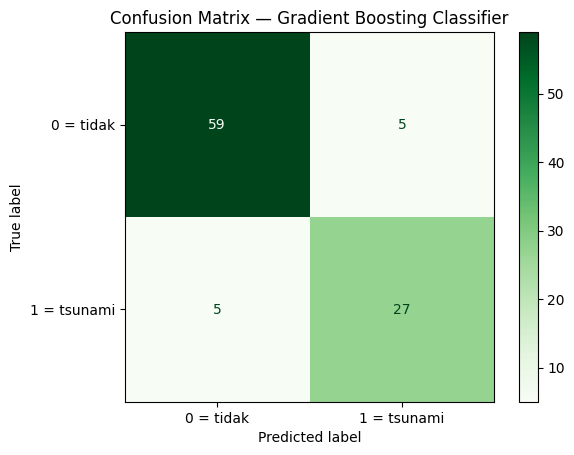

In [34]:
best_gb = grid_gb.best_estimator_
y_pred_gb = best_gb.predict(X_test)

metrics_gb = {
    "Accuracy": accuracy_score(y_test, y_pred_gb),
    "Precision": precision_score(y_test, y_pred_gb),
    "Recall": recall_score(y_test, y_pred_gb),
    "F1-Score": f1_score(y_test, y_pred_gb)
}

print("Kombinasi model terbaik : ", best_gb)
print("CV score (F1) terbaik ", grid_gb.best_score_)

print("\n📊 Gradient Boosting Performance:")
print(classification_report(y_test, y_pred_gb))
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

selector = best_gb.named_steps['selector']
if hasattr(selector, 'get_support'):
    mask = selector.get_support()
    selected = np.array(X.columns)[mask]
    print("\nFitur terbaik (terpilih):", selected)

cm_gb = confusion_matrix(y_test, y_pred_gb)
disp_gb = ConfusionMatrixDisplay(confusion_matrix=cm_gb, display_labels=['0 = tidak','1 = tsunami'])
disp_gb.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix — Gradient Boosting Classifier")
plt.show()

### **Evaluasi Model Support Vector Machine (SVM)**

Setelah proses **GridSearchCV** selesai dijalankan, tahap berikutnya adalah **mengevaluasi performa model terbaik** hasil tuning parameter terhadap data uji (`X_test`, `y_test`).  
Tahap evaluasi ini penting untuk memastikan bahwa model **Support Vector Machine (SVM)** yang diperoleh mampu **mengeneralisasi dengan baik** dan tidak hanya unggul pada data pelatihan.

---

### 🔹 **Langkah Evaluasi:**

1. **Menampilkan hasil terbaik dari GridSearchCV**  
   - Nilai *Cross Validation (CV) Accuracy* tertinggi yang dicapai selama proses pencarian parameter.  
   - Kombinasi parameter optimal untuk model SVM, meliputi nilai `C`, tipe `kernel`, dan parameter `gamma`.

2. **Mengukur akurasi pada data uji (test set)**  
   - Menghitung seberapa baik model dalam memprediksi kelas tsunami (`1`) dan tidak tsunami (`0`) pada data baru.  
   - Pengukuran dilakukan menggunakan metrik *accuracy* dan *F1-score* untuk menggambarkan keseimbangan performa prediksi antar kelas.

3. **Menampilkan fitur yang terpilih**  
   - Menggunakan metode `get_support()` dari `SelectKBest` atau `SelectPercentile` untuk menampilkan **fitur-fitur yang paling relevan** berdasarkan metode *mutual information*.  
   - Fitur yang dipilih memberikan gambaran mengenai variabel mana yang paling berpengaruh dalam pembentukan *hyperplane* pemisah antara dua kelas.

4. **Menampilkan Confusion Matrix**  
   - Menunjukkan jumlah prediksi benar dan salah dari model terhadap masing-masing kelas.  
   - Warna **biru** digunakan untuk membedakan hasil visualisasi model SVM dari model lainnya (misalnya Gradient Boosting).  
   - Confusion Matrix membantu mengevaluasi keseimbangan prediksi model antara kelas tsunami dan non-tsunami.

5. **Menampilkan Classification Report**  
   - Berisi metrik evaluasi lengkap: *precision*, *recall*, *f1-score*, dan *support* untuk masing-masing kelas.  
   - Metrik ini memberikan gambaran apakah model lebih condong mendeteksi satu kelas tertentu atau seimbang di antara keduanya.

---

> 🎯 **Tujuan utama evaluasi ini** adalah untuk memastikan bahwa model **Support Vector Machine (SVM)** memiliki kemampuan klasifikasi yang optimal,  
> tidak hanya akurat tetapi juga **stabil dalam mengenali dua kategori data (tsunami dan tidak tsunami)** secara seimbang,  
> sehingga model dapat diandalkan dalam proses deteksi dini potensi tsunami di masa depan.

---

Kombinasi model terbaik :  Pipeline(steps=[('scaler', MinMaxScaler()),
                ('selector',
                 SelectPercentile(percentile=50,
                                  score_func=functools.partial(<function mutual_info_classif at 0x15dd38860>, random_state=98))),
                ('clf', SVC(C=10, random_state=98))])
CV score (F1) terbaik  0.9085782638414216

📊 SVM Performance:
              precision    recall  f1-score   support

           0       0.88      0.91      0.89        64
           1       0.80      0.75      0.77        32

    accuracy                           0.85        96
   macro avg       0.84      0.83      0.83        96
weighted avg       0.85      0.85      0.85        96

Accuracy: 0.8541666666666666

Fitur terbaik (terpilih): ['nst' 'dmin' 'gap' 'latitude' 'longitude']


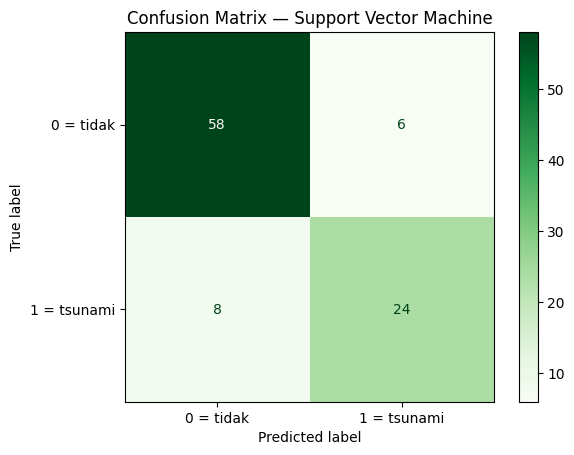

In [35]:
best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

metrics_svm = {
    "Accuracy": accuracy_score(y_test, y_pred_svm),
    "Precision": precision_score(y_test, y_pred_svm),
    "Recall": recall_score(y_test, y_pred_svm),
    "F1-Score": f1_score(y_test, y_pred_svm)
}

print("Kombinasi model terbaik : ", best_svm)
print("CV score (F1) terbaik ", grid_svm.best_score_)

print("\n📊 SVM Performance:")
print(classification_report(y_test, y_pred_svm))
print("Accuracy:", accuracy_score(y_test, y_pred_svm))

selector = best_svm.named_steps['selector']
if hasattr(selector, 'get_support'):
    mask = selector.get_support()
    selected = np.array(X.columns)[mask]
    print("\nFitur terbaik (terpilih):", selected)

cm_svm = confusion_matrix(y_test, y_pred_svm)
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm,
                                 display_labels=['0 = tidak','1 = tsunami'])
disp_svm.plot(cmap=plt.cm.Greens)
plt.title("Confusion Matrix — Support Vector Machine")
plt.show()


# Visualisasi Perbandingan Model

,Accuracy,Precision,Recall,F1-Score
Gradient Boosting,0.895833,0.84375,0.84375,0.843750
SVM,0.854167,0.80000,0.75000,0.774194


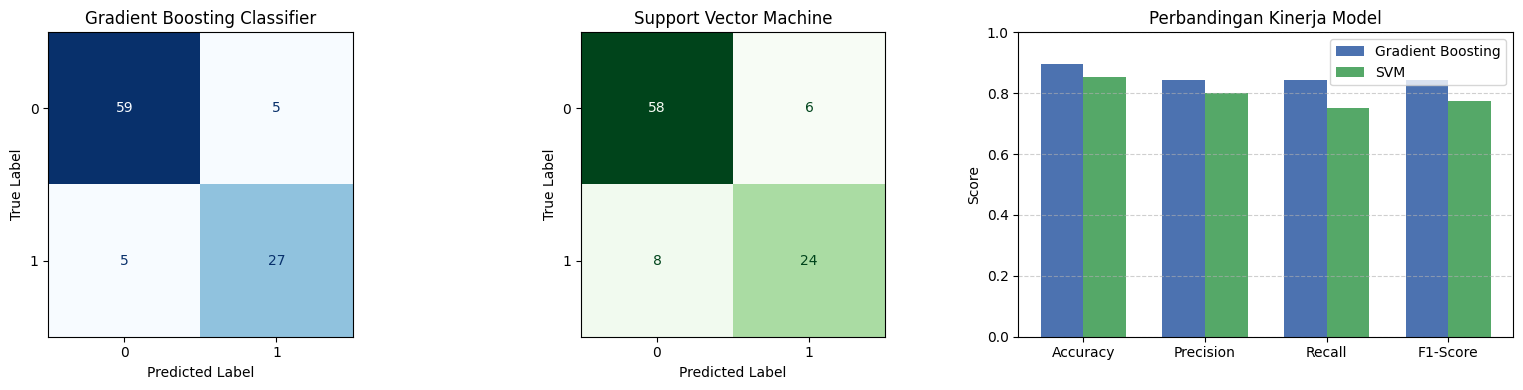

In [ ]:
# ==============================================================
# 🎨 Visualisasi Gabungan: Confusion Matrix GBC dan Confusion Matrix SVM, dan Grafik Metrik
# ==============================================================
metrics_gb = { "Accuracy": accuracy_score(y_test, y_pred_gb), "Precision": precision_score(y_test, y_pred_gb), "Recall": recall_score(y_test, y_pred_gb), "F1-Score": f1_score(y_test, y_pred_gb) } 
metrics_svm = { "Accuracy": accuracy_score(y_test, y_pred_svm), "Precision": precision_score(y_test, y_pred_svm), "Recall": recall_score(y_test, y_pred_svm), "F1-Score": f1_score(y_test, y_pred_svm) } 
df_compare = pd.DataFrame([metrics_gb, metrics_svm], index=["Gradient Boosting", "SVM"]) 
display(df_compare)
# Buat figure dengan 3 subplot (1 baris, 3 kolom)
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(16, 4))

# Confusion Matrix untuk Gradient Boosting
disp_gb = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_gb, cmap=plt.cm.Blues, colorbar=False, ax=ax1
)
ax1.set_title("Gradient Boosting Classifier")
ax1.set_xlabel("Predicted Label")
ax1.set_ylabel("True Label")

# Confusion Matrix untuk SVM
disp_svm = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_svm, cmap=plt.cm.Greens, colorbar=False, ax=ax2
)
ax2.set_title("Support Vector Machine")
ax2.set_xlabel("Predicted Label")
ax2.set_ylabel("True Label")

# Grafik Bar Perbandingan Metrik
x = np.arange(len(df_compare.columns))
width = 0.35
ax3.bar(x - width/2, df_compare.loc["Gradient Boosting"], width, label="Gradient Boosting", color="#4C72B0")
ax3.bar(x + width/2, df_compare.loc["SVM"], width, label="SVM", color="#55A868")
ax3.set_xticks(x)
ax3.set_xticklabels(df_compare.columns)
ax3.set_ylim(0, 1)
ax3.set_ylabel("Score")
ax3.set_title("Perbandingan Kinerja Model")
ax3.legend()
ax3.grid(axis="y", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()


**Feature dengan score tertinggi**

In [37]:
selector_gb = grid_gb.best_estimator_.named_steps['selector']
selector_svm = grid_svm.best_estimator_.named_steps['selector']

feature_scores_gb = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector_gb.scores_
}).sort_values(by='Score', ascending=False)

feature_scores_svm = pd.DataFrame({
    'Feature': X.columns,
    'Score': selector_svm.scores_
}).sort_values(by='Score', ascending=False)

print("\n📈 Feature Importance (GBC):")
print(feature_scores_gb)

print("\n📈 Feature Importance (SVM):")
print(feature_scores_svm)


📈 Feature Importance (GBC):
     Feature     Score
5       dmin  0.312719
4        nst  0.252118
9  longitude  0.178263
6        gap  0.110504
8   latitude  0.054922
1        cdi  0.049899
7      depth  0.039550
0  magnitude  0.000000
2        mmi  0.000000
3        sig  0.000000

📈 Feature Importance (SVM):
     Feature     Score
5       dmin  0.312719
4        nst  0.252118
9  longitude  0.178263
6        gap  0.110504
8   latitude  0.054922
1        cdi  0.049899
7      depth  0.039550
0  magnitude  0.000000
2        mmi  0.000000
3        sig  0.000000


# **Model Terbaik**

In [38]:
import pickle
acc_gb = accuracy_score(y_test, y_pred_gb)
acc_svm = accuracy_score(y_test, y_pred_svm)

if acc_gb >= acc_svm:
    best_model = best_gb
    best_name = "GradientBoosting"
else:
    best_model = best_svm
    best_name = "SVM"

with open(f"model/BestModel_CLF_{best_name}_KelompokTsunami.pkl", "wb") as f:
    pickle.dump(best_model, f)

print(f"\n✅ Model terbaik: {best_name}")
print(f"✅ File tersimpan sebagai: BestModel_CLF_{best_name}_KelompokTsunami.pkl")


✅ Model terbaik: GradientBoosting
✅ File tersimpan sebagai: BestModel_CLF_GradientBoosting_KelompokTsunami.pkl
